### This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM), to predict the closing stock price using the past 60 days stock price.

### Import Library

In [180]:
import math
import pandas_datareader as web
import numpy
import pandas
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as pyplot
import datetime
import yfinance as yahoo_finance

pyplot.style.use('fivethirtyeight')

### Get the stock quote

In [181]:
# Get the stock quote
startDate = datetime.datetime(2012,1,1)
endDate = datetime.datetime(2023,1,27)
df = yahoo_finance.download(['TEAM'], start=startDate, end=endDate)

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-09 00:00:00-05:00,21.000000,21.000000,21.000000,21.000000,21.000000,0
2015-12-10 00:00:00-05:00,27.670000,28.500000,26.500000,27.780001,27.780001,15009100
2015-12-11 00:00:00-05:00,27.850000,28.500000,27.480000,27.500000,27.500000,2286100
2015-12-14 00:00:00-05:00,27.500000,27.860001,26.110001,26.260000,26.260000,1223500
2015-12-15 00:00:00-05:00,26.389999,26.948999,26.299999,26.500000,26.500000,1086400
...,...,...,...,...,...,...
2023-01-20 00:00:00-05:00,149.440002,159.994995,148.901001,157.750000,157.750000,2793200
2023-01-23 00:00:00-05:00,155.860001,156.000000,150.059998,154.580002,154.580002,4615800
2023-01-24 00:00:00-05:00,152.664993,153.039993,147.039993,151.699997,151.699997,2212100


In [182]:
# Get the number of rows & columns in the data set
df.shape

(1795, 6)

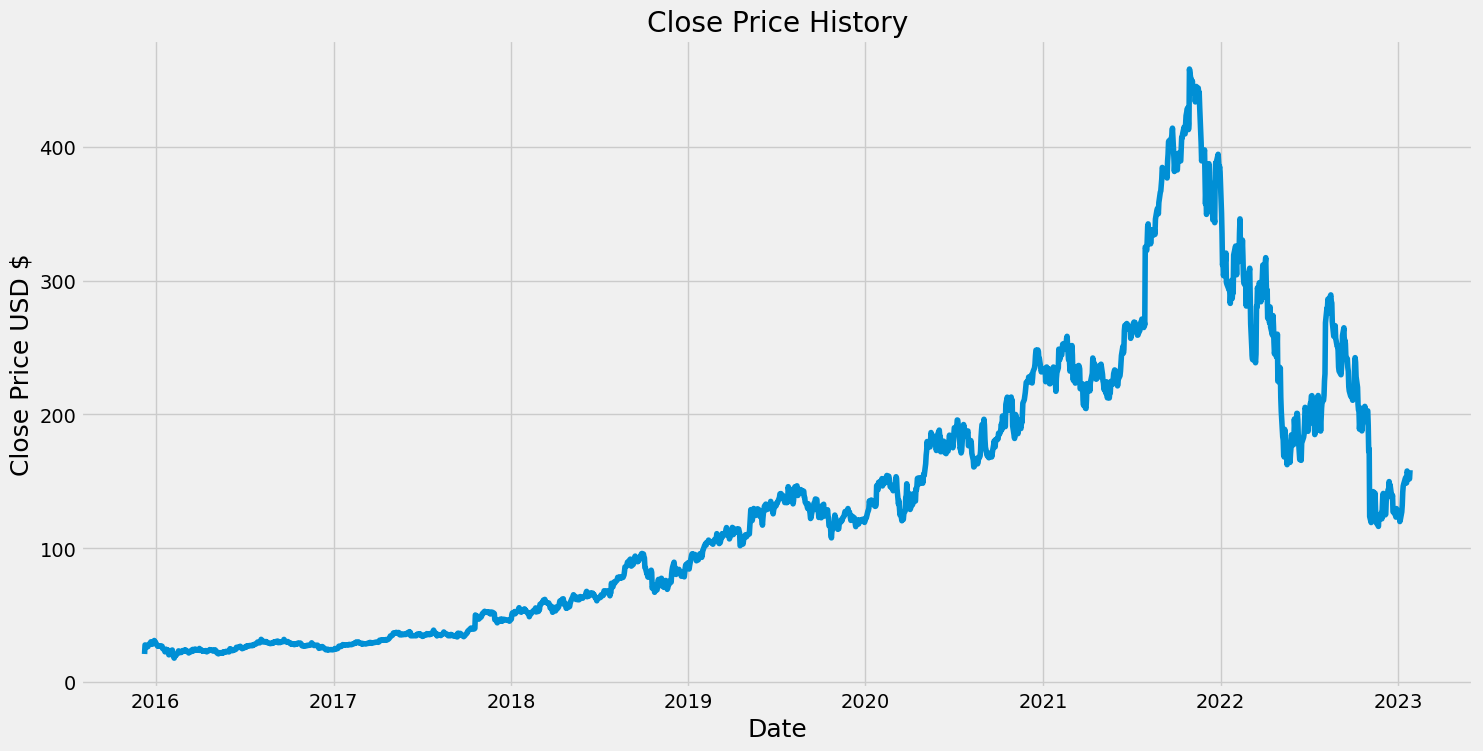

In [183]:
# Visualize the closing price
pyplot.figure(figsize=(16,8))
pyplot.title("Close Price History")
pyplot.plot(df["Close"])
pyplot.xlabel("Date", fontsize=18)
pyplot.ylabel("Close Price USD $", fontsize=18)
pyplot.show()

In [184]:
# Create a new dataframe with only the 'Close' column
TEAM_Close = df.filter(['Close'])

# Convert dataframe to a numpy array
dataset = TEAM_Close.values

# Get the number of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1436

In [185]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00699666],
       [0.0223984 ],
       [0.02176234],
       ...,
       [0.3039004 ],
       [0.30442287],
       [0.31907499]])

In [186]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    # if i <= 60:
    if i <= 61:
        print("x_train", x_train)
        print("y_train", y_train)
        print()

x_train [array([0.00699666, 0.0223984 , 0.02176234, 0.0189455 , 0.0194907 ,
       0.01958157, 0.02292088, 0.02339792, 0.02596488, 0.02766861,
       0.02401127, 0.0233752 , 0.02494264, 0.02994026, 0.02791849,
       0.02762318, 0.02155789, 0.02010404, 0.0207401 , 0.02055837,
       0.0210127 , 0.02089912, 0.02021762, 0.02001317, 0.02026306,
       0.01651485, 0.01385702, 0.01069944, 0.01435678, 0.01519729,
       0.01306195, 0.01383431, 0.00990437, 0.00561096, 0.00647418,
       0.00738284, 0.00776902, 0.01328911, 0.01381159, 0.00515663,
       0.        , 0.00227164, 0.00486131, 0.00552009, 0.00495218,
       0.0096772 , 0.01233502, 0.0092683 , 0.00956362, 0.00951819,
       0.01042684, 0.01054042, 0.01275528, 0.01222144, 0.01328911,
       0.01290293, 0.01417505, 0.01153995, 0.01158538, 0.0116081 ])]
y_train [0.010086096375772034]

x_train [array([0.00699666, 0.0223984 , 0.02176234, 0.0189455 , 0.0194907 ,
       0.01958157, 0.02292088, 0.02339792, 0.02596488, 0.02766861,
       0.0

In [187]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = numpy.array(x_train), numpy.array(y_train)

In [188]:
# Reshape the data into 3 columns
x_train = numpy.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1376, 60, 1)

In [189]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [190]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [191]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1376/1376 [==============================] - 31s 20ms/step - loss: 7.6537e-04


In [192]:
# Create the testing data set
# Create a new array containing scaled values from 542 to 602
test_data = scaled_data[training_data_len - 60:,:]
test_data

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test

[array([0.48922105, 0.4862679 , 0.48506393, 0.46216577, 0.4724109 ,
        0.4775221 , 0.47933938, 0.48701755, 0.50121532, 0.5137775 ,
        0.52922468, 0.51766203, 0.5237046 , 0.5556212 , 0.56482132,
        0.56618432, 0.56800161, 0.56693393, 0.56572997, 0.56057336,
        0.55725678, 0.55934666, 0.54278636, 0.54635285, 0.55609822,
        0.56906928, 0.57050043, 0.5650485 , 0.56954638, 0.55300875,
        0.55250906, 0.54814747, 0.54846547, 0.55137324, 0.55643895,
        0.56722926, 0.57002341, 0.57065946, 0.57556622, 0.56704756,
        0.56120942, 0.57054584, 0.56534383, 0.69784874, 0.69207874,
        0.70761684, 0.73265032, 0.73717087, 0.7191795 , 0.72220075,
        0.70330066, 0.71474976, 0.72719839, 0.72697122, 0.71806634,
        0.72422255, 0.72649419, 0.71929305, 0.74528065, 0.76002359]),
 array([0.4862679 , 0.48506393, 0.46216577, 0.4724109 , 0.4775221 ,
        0.47933938, 0.48701755, 0.50121532, 0.5137775 , 0.52922468,
        0.51766203, 0.5237046 , 0.5556212 , 0.

In [193]:
# Convert the data to numpy array
x_test = numpy.array(x_test)
x_test

array([[0.48922105, 0.4862679 , 0.48506393, ..., 0.71929305, 0.74528065,
        0.76002359],
       [0.4862679 , 0.48506393, 0.46216577, ..., 0.74528065, 0.76002359,
        0.76320395],
       [0.48506393, 0.46216577, 0.4724109 , ..., 0.76002359, 0.76320395,
        0.76211354],
       ...,
       [0.40276232, 0.40907748, 0.41548353, ..., 0.29751709, 0.31764385,
        0.31044274],
       [0.40907748, 0.41548353, 0.41982234, ..., 0.31764385, 0.31044274,
        0.3039004 ],
       [0.41548353, 0.41982234, 0.39485701, ..., 0.31044274, 0.3039004 ,
        0.30442287]])

In [194]:
# Reshape the data
x_test = numpy.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.48922105],
        [0.4862679 ],
        [0.48506393],
        ...,
        [0.71929305],
        [0.74528065],
        [0.76002359]],

       [[0.4862679 ],
        [0.48506393],
        [0.46216577],
        ...,
        [0.74528065],
        [0.76002359],
        [0.76320395]],

       [[0.48506393],
        [0.46216577],
        [0.4724109 ],
        ...,
        [0.76002359],
        [0.76320395],
        [0.76211354]],

       ...,

       [[0.40276232],
        [0.40907748],
        [0.41548353],
        ...,
        [0.29751709],
        [0.31764385],
        [0.31044274]],

       [[0.40907748],
        [0.41548353],
        [0.41982234],
        ...,
        [0.31764385],
        [0.31044274],
        [0.3039004 ]],

       [[0.41548353],
        [0.41982234],
        [0.39485701],
        ...,
        [0.31044274],
        [0.3039004 ],
        [0.30442287]]])

In [195]:
# Get the models predicted price values
predictions = model.predict(x_test)

# Unscaling the values
predictions = scaler.inverse_transform(predictions)

predictions

12/12 [==============================] - 1s 11ms/step


array([[345.02847],
       [347.94662],
       [350.63074],
       [352.51212],
       [354.80707],
       [357.87753],
       [361.0305 ],
       [364.39728],
       [367.9481 ],
       [372.14835],
       [375.7682 ],
       [378.72903],
       [380.7053 ],
       [382.15625],
       [382.8171 ],
       [384.5518 ],
       [387.1015 ],
       [390.80026],
       [394.62   ],
       [397.58276],
       [400.4679 ],
       [402.99298],
       [405.4333 ],
       [408.03806],
       [407.81406],
       [405.29572],
       [402.81693],
       [401.0618 ],
       [399.9296 ],
       [398.12064],
       [397.14578],
       [397.2372 ],
       [397.52078],
       [397.62097],
       [397.49908],
       [398.22754],
       [400.31552],
       [402.67297],
       [405.22632],
       [408.1256 ],
       [410.29306],
       [411.80527],
       [413.70578],
       [416.2084 ],
       [419.3211 ],
       [421.77664],
       [422.3183 ],
       [422.53427],
       [427.29575],
       [432.32544],


In [196]:
# Get the root mean squared error (RMSE)
rmse = numpy.sqrt(numpy.mean(((predictions-y_test)**2)))
rmse

21.363887433294213

/var/folders/vs/9m6hqff97kv6hpz3sxt392sm0000gn/T/ipykernel_32236/2553831708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


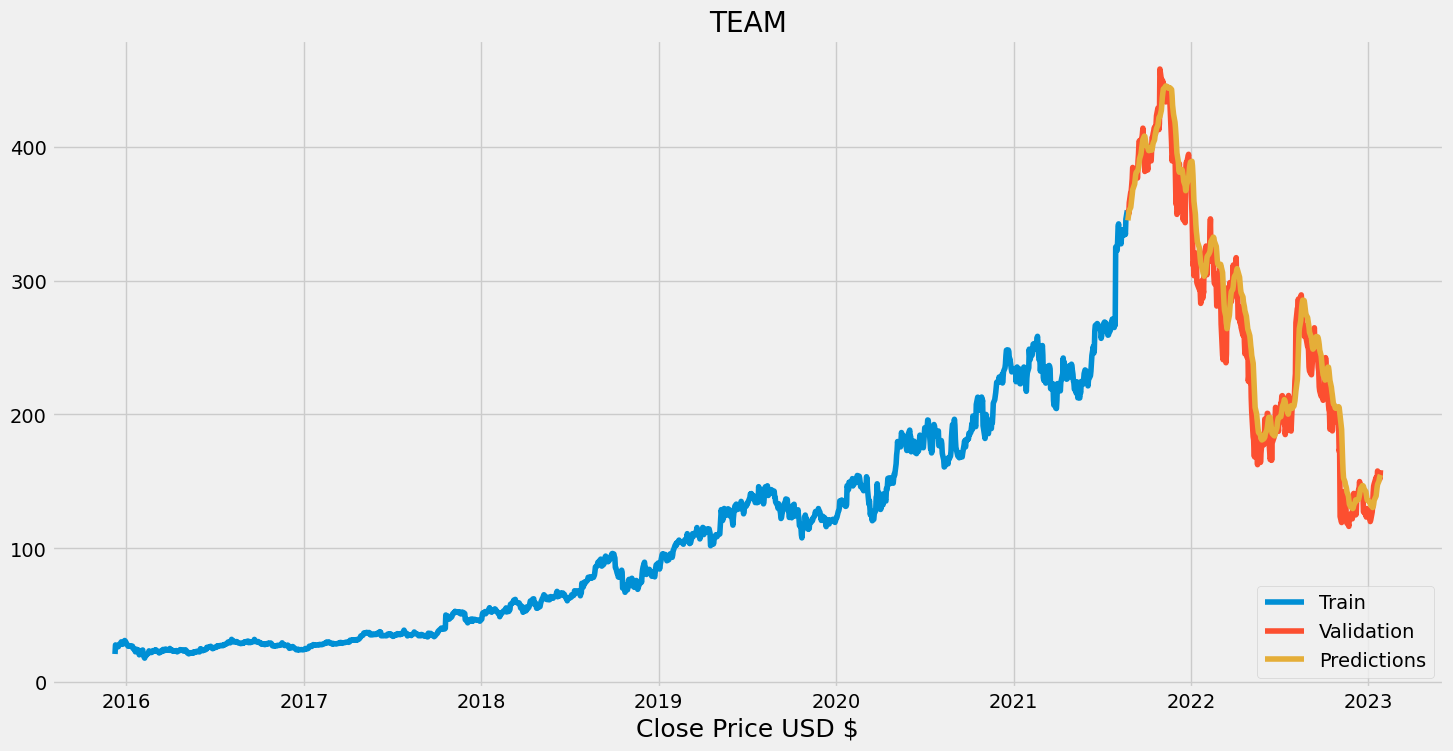

In [197]:
# Plot the data
train = TEAM_Close[:training_data_len]
valid = TEAM_Close[training_data_len:]
valid["Predictions"] = predictions

# Visualize the data
pyplot.figure(figsize=(16,8))
pyplot.title("TEAM")
pyplot.xlabel("Date", fontsize=18)
pyplot.xlabel("Close Price USD $", fontsize=18)
pyplot.plot(train['Close'])
pyplot.plot(valid[["Close", "Predictions"]])
pyplot.legend(["Train", "Validation", "Predictions"], loc="lower right")
pyplot.show()

In [198]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-24 00:00:00-04:00,353.890015,345.028473
2021-08-25 00:00:00-04:00,353.410004,347.946625
2021-08-26 00:00:00-04:00,349.989990,350.630737
2021-08-27 00:00:00-04:00,358.339996,352.512115
2021-08-30 00:00:00-04:00,366.029999,354.807068
...,...,...
2023-01-20 00:00:00-05:00,157.750000,147.704788
2023-01-23 00:00:00-05:00,154.580002,150.355057
2023-01-24 00:00:00-05:00,151.699997,152.552200


In [199]:
# Get the quote
startDate = datetime.datetime(2012,1,1)
endDate = datetime.datetime(2023,1,28)
stock_quote = yahoo_finance.download(['TEAM'], start=startDate, end=endDate)

# Create a new dataframe
new_df = stock_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60Days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60Days_scaled = scaler.transform(last_60Days)

# Create an empty list
X_Test = []

# Append the past 60 days
X_Test.append(last_60Days_scaled)

# Convert the X_Test data set to a numpy array
X_Test = numpy.array(X_Test)

# Reshape the data
X_Test = numpy.reshape(X_Test, (X_Test.shape[0], X_Test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_Test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)


print("TEAM Predicted Price:", pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 34ms/step
TEAM Predicted Price: [[158.21667]]


In [200]:
# Get the quote
startDate = datetime.datetime(2023,1,28)
endDate = datetime.datetime(2023,1,28)
stock_quote2 = yahoo_finance.download(['TEAM'], start=startDate, end=endDate)

print("TEAM Predicted Price:", stock_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
TEAM Predicted Price: Date
2023-01-27 00:00:00-05:00    164.25
Name: Close, dtype: float64
